## Feature Engineering and Remodeling  

#### To Do:

1. Perform the required Feature Engineering (Feature Selection using RFE, Feature Transformation, etc.)

2. Rebuild the models (Logistic Regression, SVM, KNN, DT, RF, Gradient Boosting, AdaBoosting etc.

3. Compare the model (With Feature Engineering) Performance with previous model (Without Feature Engineering) 

## 1. Basic Pandas Operations

In [1]:
# Import all the required Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from collections import Counter
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,auc,roc_curve,roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

from sklearn.feature_selection import RFE

In [2]:
# Read the dataset and display the head. You will get the output as mentioned below

df=pd.read_csv(r"C:\Users\Lenovo\classfiles\Machine learning\train.csv")
df.head()

,Unnamed: 0,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,27385,27386,C3,64,Owned,Individual,36,36,No,X1,14+,2.0,16,13320.0,0
1,33499,33500,C3,2955,Owned,Individual,66,66,No,X6,10,1.0,19,16152.0,0
2,7997,7998,C1,1542,Rented,Individual,24,24,No,NaN,3,1.0,16,7310.0,0
3,33032,33033,C26,772,Rented,Individual,75,75,No,X1,1,3.0,16,15792.0,0
4,30516,30517,C2,1510,Owned,Joint,59,58,Yes,X1,14+,4.0,17,23673.0,0


In [3]:
# Check the shape of the dataframe

df.shape

(10000, 15)

In [4]:
# On the dataframe apply info() function and observe the Dtypes and Missing Values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               10000 non-null  int64  
 1   ID                       10000 non-null  int64  
 2   City_Code                10000 non-null  object 
 3   Region_Code              10000 non-null  int64  
 4   Accomodation_Type        10000 non-null  object 
 5   Reco_Insurance_Type      10000 non-null  object 
 6   Upper_Age                10000 non-null  int64  
 7   Lower_Age                10000 non-null  int64  
 8   Is_Spouse                10000 non-null  object 
 9   Health Indicator         7671 non-null   object 
 10  Holding_Policy_Duration  5946 non-null   object 
 11  Holding_Policy_Type      5946 non-null   float64
 12  Reco_Policy_Cat          10000 non-null  int64  
 13  Reco_Policy_Premium      10000 non-null  float64
 14  Response               

In [5]:
df.isna().sum()

Unnamed: 0                    0
ID                            0
City_Code                     0
Region_Code                   0
Accomodation_Type             0
Reco_Insurance_Type           0
Upper_Age                     0
Lower_Age                     0
Is_Spouse                     0
Health Indicator           2329
Holding_Policy_Duration    4054
Holding_Policy_Type        4054
Reco_Policy_Cat               0
Reco_Policy_Premium           0
Response                      0
dtype: int64

## 2. Cleaning the Data

In [6]:
# Impute the Null values in Health Indicator, Holding_Policy_Duration and Holding_Policy_Type

df['Holding_Policy_Type'].fillna(df['Holding_Policy_Type'].mean(), inplace = True)
df['Holding_Policy_Duration'].fillna(df['Holding_Policy_Duration'].mode()[0], inplace = True) 
df['Health Indicator'].fillna(df['Health Indicator'].mode()[0], inplace = True)
print(df.isnull().sum())

Unnamed: 0                 0
ID                         0
City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
Response                   0
dtype: int64


In [7]:
# Check again Holding_Policy_Duration is in object column convert that into int


df['Holding_Policy_Duration'].value_counts()

14+    4952
1       867
2       790
3       696
4       530
5       461
6       374
7       320
8       254
9       205
10      166
12      104
13      103
11       89
14       89
Name: Holding_Policy_Duration, dtype: int64

In [8]:
df['Holding_Policy_Duration'] = df['Holding_Policy_Duration'].replace(['1','2','3','4','5','6','7','8','9','10','11','12','13','14'],'14-')
df['Holding_Policy_Duration'].value_counts()

14-    5048
14+    4952
Name: Holding_Policy_Duration, dtype: int64

In [9]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
df['Holding_Policy_Duration'] = label_encoder.fit_transform(df['Holding_Policy_Duration'])
df['Holding_Policy_Duration'].unique()

array([0, 1])

In [10]:
# Observe that ['Accomodation_Type','Reco_Insurance_Type','Is_Spouse'] 
# above these Object columns have two values - Yes and No

print(df['Accomodation_Type'].head())
print(df['Reco_Insurance_Type'].head())
print(df['Is_Spouse'].head())

0     Owned
1     Owned
2    Rented
3    Rented
4     Owned
Name: Accomodation_Type, dtype: object
0    Individual
1    Individual
2    Individual
3    Individual
4         Joint
Name: Reco_Insurance_Type, dtype: object
0     No
1     No
2     No
3     No
4    Yes
Name: Is_Spouse, dtype: object


In [11]:
# Converting all the Yes to 1 and No to 0. 



# Write a for loop to iterate over the list given above
# For each feature use pandas 'apply()' to convert all the 'Yes' to 1 and 'No' to 0

%timeit
df['Is_Spouse']=df['Is_Spouse'].apply(lambda x:0 if x=='No' else 1)


    


In [12]:
%timeit
df['Accomodation_Type']=df['Accomodation_Type'].apply(lambda x:0 if x=='Rented' else 1)
df['Accomodation_Type']

0       1
1       1
2       0
3       0
4       1
       ..
9995    1
9996    0
9997    1
9998    0
9999    1
Name: Accomodation_Type, Length: 10000, dtype: int64

In [13]:
%timeit
df['Reco_Insurance_Type']=df['Reco_Insurance_Type'].apply(lambda x:0 if x=='Joint' else 1)
df['Reco_Insurance_Type']

0       1
1       1
2       1
3       1
4       0
       ..
9995    0
9996    1
9997    1
9998    1
9999    0
Name: Reco_Insurance_Type, Length: 10000, dtype: int64

In [14]:
# Now again having a look at all those columns to see if everything went well

df.head()

,Unnamed: 0,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,27385,27386,C3,64,1,1,36,36,0,X1,0,2.0,16,13320.0,0
1,33499,33500,C3,2955,1,1,66,66,0,X6,1,1.0,19,16152.0,0
2,7997,7998,C1,1542,0,1,24,24,0,X1,1,1.0,16,7310.0,0
3,33032,33033,C26,772,0,1,75,75,0,X1,1,3.0,16,15792.0,0
4,30516,30517,C2,1510,1,0,59,58,1,X1,0,4.0,17,23673.0,0


In [15]:
# Observe that all those columns are now converted from Object to Int64

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               10000 non-null  int64  
 1   ID                       10000 non-null  int64  
 2   City_Code                10000 non-null  object 
 3   Region_Code              10000 non-null  int64  
 4   Accomodation_Type        10000 non-null  int64  
 5   Reco_Insurance_Type      10000 non-null  int64  
 6   Upper_Age                10000 non-null  int64  
 7   Lower_Age                10000 non-null  int64  
 8   Is_Spouse                10000 non-null  int64  
 9   Health Indicator         10000 non-null  object 
 10  Holding_Policy_Duration  10000 non-null  int32  
 11  Holding_Policy_Type      10000 non-null  float64
 12  Reco_Policy_Cat          10000 non-null  int64  
 13  Reco_Policy_Premium      10000 non-null  float64
 14  Response               

In [16]:
# Checking all the Object Dtypes - Here, these columns have more than 2 categories

df['City_Code'].unique()

array(['C3', 'C1', 'C26', 'C2', 'C17', 'C4', 'C16', 'C9', 'C23', 'C21',
       'C6', 'C7', 'C11', 'C22', 'C15', 'C13', 'C8', 'C35', 'C29', 'C33',
       'C10', 'C12', 'C19', 'C5', 'C18', 'C14', 'C24', 'C27', 'C20',
       'C34', 'C36', 'C25', 'C28', 'C32', 'C30', 'C31'], dtype=object)

In [17]:
df['Health Indicator'].unique()

array(['X1', 'X6', 'X4', 'X2', 'X3', 'X5', 'X8', 'X7', 'X9'], dtype=object)

In [18]:
# You can also do this to separate Object columns

df_categorical=df.select_dtypes(include='object')
df_categorical

,City_Code,Health Indicator
0,C3,X1
1,C3,X6
2,C1,X1
3,C26,X1
4,C2,X1
...,...,...
9995,C3,X5
9996,C5,X1
9997,C1,X1
9998,C1,X5


In [19]:
# Lets just try to see what is happening Response. Check the output.

df['Response'].unique()

array([0, 1], dtype=int64)

In [20]:
# Dropping unknown column

# Write the code here to drop unknown column and check dataframe shape
df=df.drop(['Unnamed: 0'], axis=1)
df.head()


,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,27386,C3,64,1,1,36,36,0,X1,0,2.0,16,13320.0,0
1,33500,C3,2955,1,1,66,66,0,X6,1,1.0,19,16152.0,0
2,7998,C1,1542,0,1,24,24,0,X1,1,1.0,16,7310.0,0
3,33033,C26,772,0,1,75,75,0,X1,1,3.0,16,15792.0,0
4,30517,C2,1510,1,0,59,58,1,X1,0,4.0,17,23673.0,0


In [21]:
df.shape

(10000, 14)

In [22]:
# Getting all the Object Dtypes

print(df_categorical)
print(df_categorical.dtypes)
print(df_categorical.shape)

     City_Code Health Indicator
0           C3               X1
1           C3               X6
2           C1               X1
3          C26               X1
4           C2               X1
...        ...              ...
9995        C3               X5
9996        C5               X1
9997        C1               X1
9998        C1               X5
9999        C7               X2

[10000 rows x 2 columns]
City_Code           object
Health Indicator    object
dtype: object
(10000, 2)


In [23]:
# Encoding the categorical features



# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

# Write the code here to use 'encoder' to convert all the categorical columns to numerical representations
# Take extra care to convert encoded numpy array to dataframe and call that data fram 'df_encoded'

from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse=False)
df_encoded=encoder.fit_transform(df_categorical)
df_encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
df_encoded=pd.get_dummies(df_categorical,drop_first=True)

In [25]:
df_numerical=df.select_dtypes(include='number')
print(df_numerical.head())
print(df_numerical.shape)

      ID  Region_Code  Accomodation_Type  Reco_Insurance_Type  Upper_Age  \
0  27386           64                  1                    1         36   
1  33500         2955                  1                    1         66   
2   7998         1542                  0                    1         24   
3  33033          772                  0                    1         75   
4  30517         1510                  1                    0         59   

   Lower_Age  Is_Spouse  Holding_Policy_Duration  Holding_Policy_Type  \
0         36          0                        0                  2.0   
1         66          0                        1                  1.0   
2         24          0                        1                  1.0   
3         75          0                        1                  3.0   
4         58          1                        0                  4.0   

   Reco_Policy_Cat  Reco_Policy_Premium  Response  
0               16              13320.0         0  


In [26]:
# Concatinating the original data frame and onehot encoded dataframe

df_main=pd.concat([df_numerical,df_encoded],axis=1)

df_main


,ID,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,...,City_Code_C8,City_Code_C9,Health Indicator_X2,Health Indicator_X3,Health Indicator_X4,Health Indicator_X5,Health Indicator_X6,Health Indicator_X7,Health Indicator_X8,Health Indicator_X9
0,27386,64,1,1,36,36,0,0,2.000000,16,...,0,0,0,0,0,0,0,0,0,0
1,33500,2955,1,1,66,66,0,1,1.000000,19,...,0,0,0,0,0,0,1,0,0,0
2,7998,1542,0,1,24,24,0,1,1.000000,16,...,0,0,0,0,0,0,0,0,0,0
3,33033,772,0,1,75,75,0,1,3.000000,16,...,0,0,0,0,0,0,0,0,0,0
4,30517,1510,1,0,59,58,1,0,4.000000,17,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,5204,13,1,0,47,40,1,0,2.431719,19,...,0,0,0,0,0,1,0,0,0,0
9996,35449,1477,0,1,34,34,0,1,1.000000,4,...,0,0,0,0,0,0,0,0,0,0
9997,47254,2357,1,1,64,64,0,1,2.000000,19,...,0,0,0,0,0,0,0,0,0,0
9998,42545,1443,0,1,53,53,0,0,3.000000,13,...,0,0,0,0,0,1,0,0,0,0


In [27]:
df_main.columns

Index(['ID', 'Region_Code', 'Accomodation_Type', 'Reco_Insurance_Type',
       'Upper_Age', 'Lower_Age', 'Is_Spouse', 'Holding_Policy_Duration',
       'Holding_Policy_Type', 'Reco_Policy_Cat', 'Reco_Policy_Premium',
       'Response', 'City_Code_C10', 'City_Code_C11', 'City_Code_C12',
       'City_Code_C13', 'City_Code_C14', 'City_Code_C15', 'City_Code_C16',
       'City_Code_C17', 'City_Code_C18', 'City_Code_C19', 'City_Code_C2',
       'City_Code_C20', 'City_Code_C21', 'City_Code_C22', 'City_Code_C23',
       'City_Code_C24', 'City_Code_C25', 'City_Code_C26', 'City_Code_C27',
       'City_Code_C28', 'City_Code_C29', 'City_Code_C3', 'City_Code_C30',
       'City_Code_C31', 'City_Code_C32', 'City_Code_C33', 'City_Code_C34',
       'City_Code_C35', 'City_Code_C36', 'City_Code_C4', 'City_Code_C5',
       'City_Code_C6', 'City_Code_C7', 'City_Code_C8', 'City_Code_C9',
       'Health Indicator_X2', 'Health Indicator_X3', 'Health Indicator_X4',
       'Health Indicator_X5', 'Health Indicat

In [28]:
# Drop all the unwanted columns.
df_final = df_main.drop(['ID'],axis=1)


# Because we have already encoded them and added to main dataframe



## Observe that 26.5% datapoints belong to one class rest all belongs to other class. Clearly dataset is having high imbalance.

**To Do:**
1. Read about Oversampling and Undersampling.
2. Perform undersampling.

In [29]:
# Find Number of samples having one as response

one_response = len(df_final[df_final['Response'] == 1])
print(one_response)


2459


In [30]:
# Get indices having zero as response

zero_response_indices = df_final[df_final['Response'] == 0].index
print(zero_response_indices)


Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,   10,
            ...
            9986, 9987, 9989, 9992, 9993, 9994, 9996, 9997, 9998, 9999],
           dtype='int64', length=7541)


In [31]:
# Random samples of zero indices

random_indices = np.random.choice(zero_response_indices, one_response, replace = False)
print(random_indices)


[4217 7653 9376 ... 2685 6551 7647]


In [32]:
# Find the indices of response having one 

response_indices = df_final[df_final['Response'] == 1].index
print(response_indices)


Int64Index([   9,   12,   21,   22,   34,   39,   40,   41,   42,   56,
            ...
            9955, 9959, 9968, 9975, 9980, 9983, 9988, 9990, 9991, 9995],
           dtype='int64', length=2459)


In [33]:
# Concat response_indices with random_indices

under_sample_indices = np.concatenate([response_indices, random_indices])
print(under_sample_indices)


[   9   12   21 ... 2685 6551 7647]


In [34]:
# Get Balance Dataframe

under_sample = df_final.loc[under_sample_indices]
print(under_sample.head())


    Region_Code  Accomodation_Type  Reco_Insurance_Type  Upper_Age  Lower_Age  \
9          3377                  0                    1         30         30   
12         5029                  1                    1         73         73   
21          573                  1                    1         35         35   
22          849                  1                    1         42         42   
34           71                  1                    1         36         36   

    Is_Spouse  Holding_Policy_Duration  Holding_Policy_Type  Reco_Policy_Cat  \
9           0                        0             2.431719               13   
12          0                        1             3.000000               15   
21          0                        1             3.000000               15   
22          0                        1             4.000000               22   
34          0                        1             1.000000               16   

    Reco_Policy_Premium  ...  Ci

<AxesSubplot:xlabel='Response', ylabel='count'>

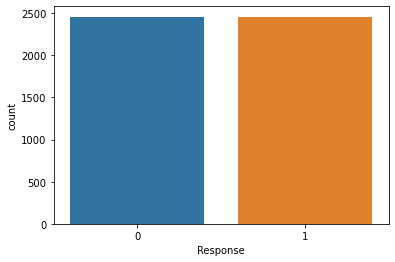

In [35]:
# Visualising Undersampled Data

sns.countplot(x = under_sample['Response'], data = under_sample)

In [36]:
under_sample.shape
under_sample.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4918 entries, 9 to 7647
Data columns (total 54 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Region_Code              4918 non-null   int64  
 1   Accomodation_Type        4918 non-null   int64  
 2   Reco_Insurance_Type      4918 non-null   int64  
 3   Upper_Age                4918 non-null   int64  
 4   Lower_Age                4918 non-null   int64  
 5   Is_Spouse                4918 non-null   int64  
 6   Holding_Policy_Duration  4918 non-null   int32  
 7   Holding_Policy_Type      4918 non-null   float64
 8   Reco_Policy_Cat          4918 non-null   int64  
 9   Reco_Policy_Premium      4918 non-null   float64
 10  Response                 4918 non-null   int64  
 11  City_Code_C10            4918 non-null   uint8  
 12  City_Code_C11            4918 non-null   uint8  
 13  City_Code_C12            4918 non-null   uint8  
 14  City_Code_C13           

In [37]:
df_under_sample = pd.get_dummies(under_sample)
df_under_sample.head()
df_under_sample.shape


(4918, 54)

In [38]:
# check all the columns of the encoded dataframe

df_under_sample.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4918 entries, 9 to 7647
Data columns (total 54 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Region_Code              4918 non-null   int64  
 1   Accomodation_Type        4918 non-null   int64  
 2   Reco_Insurance_Type      4918 non-null   int64  
 3   Upper_Age                4918 non-null   int64  
 4   Lower_Age                4918 non-null   int64  
 5   Is_Spouse                4918 non-null   int64  
 6   Holding_Policy_Duration  4918 non-null   int32  
 7   Holding_Policy_Type      4918 non-null   float64
 8   Reco_Policy_Cat          4918 non-null   int64  
 9   Reco_Policy_Premium      4918 non-null   float64
 10  Response                 4918 non-null   int64  
 11  City_Code_C10            4918 non-null   uint8  
 12  City_Code_C11            4918 non-null   uint8  
 13  City_Code_C12            4918 non-null   uint8  
 14  City_Code_C13           

In [39]:
# Drop all the unwanted columns.


# Because we have already encoded them and added to main dataframe

df_under_sample.drop(['City_Code_C10', 'City_Code_C11',
       'City_Code_C12', 'City_Code_C13', 'City_Code_C14', 'City_Code_C15',
       'City_Code_C16', 'City_Code_C17', 'City_Code_C18', 'City_Code_C19',
       'City_Code_C2', 'City_Code_C20', 'City_Code_C21', 'City_Code_C22',
       'City_Code_C23', 'City_Code_C24', 'City_Code_C25', 'City_Code_C26',
       'City_Code_C27', 'City_Code_C28', 'City_Code_C29', 'City_Code_C3',
       'City_Code_C30', 'City_Code_C31', 'City_Code_C32', 'City_Code_C33',
       'City_Code_C34', 'City_Code_C35', 'City_Code_C36', 'City_Code_C4',
       'City_Code_C5', 'City_Code_C6', 'City_Code_C7', 'City_Code_C8',
       'City_Code_C9'], axis = 1, inplace = True)
df_under_sample.shape

(4918, 19)

## Train Test Split

**To Do:**
1. Sandardise the data
2. Perform 80-20 split

In [40]:
X = df_under_sample.loc[:,df_under_sample.columns != 'Response']
y = df_under_sample.loc[:,df_under_sample.columns == 'Response']


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(3442, 18) (1476, 18) (3442, 1) (1476, 1)


## Model Building - Logistic Regression

**To Do:**
1. Perform appropriate Hyperparameter Tuning
2. Train the Model using `Accuracy` as the evaluation metric
3. Predict
4. Evaluate
5. Use Accuracy, Confusion Matrix, Precision & Recall, F1-score and ROC AUC to understand model performance

## Model Building - SVM, KNN, DT, RF, Gradient Boosting, AdaBoosting etc

For all the algorithms mentioned above, perform below mentioned steps.

**To Do:**
1. Perform appropriate Hyperparameter Tuning
2. Train the Model using `Accuracy` as the evaluation metric
3. Predict
4. Evaluate
5. Use Accuracy, Confusion Matrix, Precision & Recall, F1-score and ROC AUC to understand model performance
6. Compare the perormance of all the models

## 1.Logistic Regression

In [41]:
# Logistic Regression Classifier
classifier_1 = LogisticRegression(random_state=0, solver="liblinear")
classifier_1.fit(X_train, y_train)


LogisticRegression(random_state=0, solver='liblinear')

In [42]:
# parameters
classifier_1.get_params(deep=True)

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 0,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [43]:

#  Predict
y_pred_logi = classifier_1.predict(X_test)

# Generate predictions
predictions_logi_train =classifier_1.predict(X_train)
predictions_logi_test= classifier_1.predict(X_test)

#ACCURACY = TRAIN DATA SCORE 
train_Acc_1=classifier_1.score(X_train,y_train) 
print('Train_Score : ',train_Acc_1*100)

#ACCURACY = TEST DATA SCORE 
Acc_1=classifier_1.score(X_test, y_test)
print('Test_Score : ',Acc_1*100)




Train_Score :  53.92213829169088
Test_Score :  52.10027100271003


confusion_matrix is : 
[[327 383]
 [324 442]]
Accuracy score: 52.10027100271003
Precision score: 53.57575757575758
Recall score: 57.702349869451695
F1 score: 55.56253928346951
roc_auc_score_1 :  51.87934394881035
classification_report is : 
              precision    recall  f1-score   support

           0       0.50      0.46      0.48       710
           1       0.54      0.58      0.56       766

    accuracy                           0.52      1476
   macro avg       0.52      0.52      0.52      1476
weighted avg       0.52      0.52      0.52      1476

[0.        0.5191538 1.       ] [0.         0.59952747 1.        ] [2 1 0]
[0.         0.53943662 1.        ] [0.        0.5770235 1.       ] [2 1 0]
Train AUC: 0.540
Test AUC: 0.519


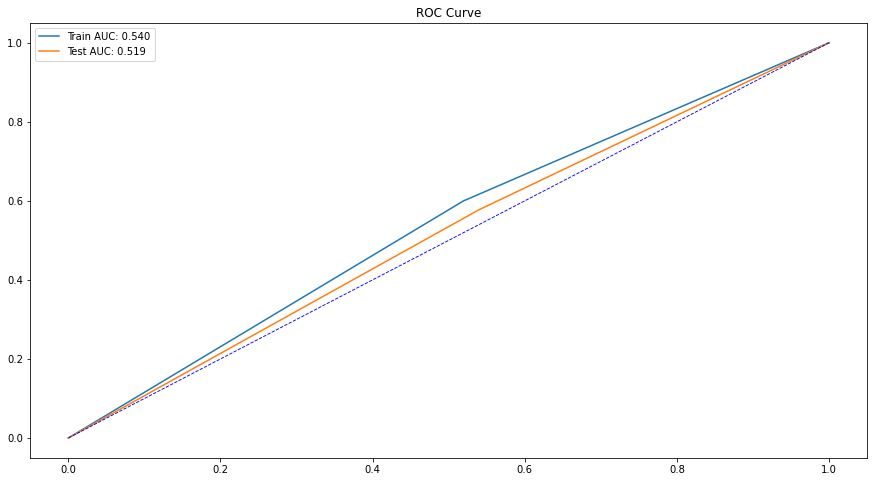

In [44]:
#  Confusion Matrix
print('confusion_matrix is : ')
cm_1= metrics.confusion_matrix(y_test, y_pred_logi) 
print(cm_1)

print('='*100)

accuracy_1 = metrics.accuracy_score(y_test, y_pred_logi) 
print("Accuracy score:",accuracy_1*100)

precision_1 = metrics.precision_score(y_test, y_pred_logi) 
print("Precision score:",precision_1*100)

recall_1 = metrics.recall_score(y_test, y_pred_logi) 
print("Recall score:",recall_1*100)

f1_1 = metrics.f1_score(y_test,y_pred_logi)
print("F1 score:",f1_1*100)

roc_auc_1 = roc_auc_score(y_test, predictions_logi_test)
print('roc_auc_score_1 : ', roc_auc_1*100)

print('='*100)

# Checking the summary of classification
print('classification_report is : ')
print(classification_report(y_test, predictions_logi_test))

print('='*100)

# calculate ROC
FPR, TPR, LRM = roc_curve(y_train, predictions_logi_train)
FPR1, TPR1, LRM = roc_curve(y_test,predictions_logi_test)
print(FPR, TPR, LRM)
print(FPR1, TPR1, LRM)

print('='*100)

# calculate AUC
auc_train_logi = auc(FPR, TPR)
print('Train AUC: %0.3f' % auc_train_logi)

auc_test_logi = auc(FPR1, TPR1)
print('Test AUC: %0.3f' % auc_test_logi)

print('='*100)

# plot the ROC curve
plt.figure(figsize=(15,8))
plt.plot(FPR, TPR, label = 'Train AUC: %0.3f'%auc_train_logi)
plt.plot(FPR1, TPR1, label = 'Test AUC: %0.3f'%auc_test_logi)

plt.plot([1,0],[1,0], ls = '--', color = 'blue', lw = 0.90)

plt.title('ROC Curve')
plt.legend()
plt.show();

## Hyper-parameters:

In [45]:
tuned_parameters = [{'C': [10**-4, 10**-2, 10**0, 10**2, 10**4]}]
logi = GridSearchCV(LogisticRegression(penalty='l2'), tuned_parameters, scoring = 'roc_auc', cv=5)
logi.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'C': [0.0001, 0.01, 1, 100, 10000]}],
             scoring='roc_auc')

In [46]:
cv_results_svc=pd.DataFrame(logi.cv_results_)
cv_results_svc.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.104547,0.037883,0.013004,0.002669,0.0001,{'C': 0.0001},0.529043,0.543826,0.541361,0.549442,0.590469,0.550828,0.020912,2
1,0.115218,0.036830,0.014417,0.004088,0.01,{'C': 0.01},0.540211,0.543363,0.547549,0.571268,0.572449,0.554968,0.013991,1
2,0.095417,0.023165,0.014399,0.001957,1,{'C': 1},0.531058,0.543363,0.547642,0.554286,0.569533,0.549176,0.012688,3
3,0.091980,0.026766,0.013593,0.001959,100,{'C': 100},0.531083,0.543363,0.547608,0.554142,0.569347,0.549109,0.012610,4
4,0.097927,0.025388,0.012940,0.001590,10000,{'C': 10000},0.531075,0.543363,0.547608,0.554134,0.569313,0.549098,0.012601,5


In [47]:
#The accuracy of the model with the best parameters
logi_score=(logi.score(X_test, y_test)*100)
print("Accuracy is :" ,logi_score)

print('='*100)

logi_score1=logi.best_score_
print("best_score : ",logi_score1*100)
print("best_params : ",logi.best_params_)
print("best_estimator : ",logi.best_estimator_)

print('='*100)

# Checking the summary of classification
print('classification_report is : ')
y_grid = logi.predict(X_test)
print(classification_report(y_test, y_grid))

print('='*100)

hyper_accuracy_1 = metrics.accuracy_score(y_test, y_grid) 
print("Accuracy score:",hyper_accuracy_1*100)

hyper_precision_1 = metrics.precision_score(y_test, y_grid) 
print("Precision score:",hyper_precision_1*100)

hyper_recall_1 = metrics.recall_score(y_test, y_grid) 
print("Recall score:",hyper_recall_1*100)

hyper_f1_1 = metrics.f1_score(y_test, y_grid)
print("F1 score:",hyper_f1_1*100)

# roc auc score for test data
hyper_roc_auc_1 = roc_auc_score(y_test, y_grid)
print('roc_auc_score_3 : ', hyper_roc_auc_1*100)

Accuracy is : 53.307101092192845
best_score :  55.496779767507185
best_params :  {'C': 0.01}
best_estimator :  LogisticRegression(C=0.01)
classification_report is : 
              precision    recall  f1-score   support

           0       0.53      0.45      0.48       710
           1       0.55      0.63      0.59       766

    accuracy                           0.54      1476
   macro avg       0.54      0.54      0.53      1476
weighted avg       0.54      0.54      0.54      1476

Accuracy score: 53.99728997289973
Precision score: 54.98281786941581
Recall score: 62.66318537859008
F1 score: 58.572300183038436
roc_auc_score_3 :  53.655536351266875


## Feature selection:

In [48]:
# Logistic Regression Model Fitting

rfe_logi = RFE(classifier_1,n_features_to_select=3)
rfe_fit_logi = rfe_logi.fit(X_train,y_train)
X_test_transform_logi = rfe_fit_logi.transform(X_test)

print("x_test.shape: {}".format(X_test.shape))
print("X_test_transform_logi.shape: {}".format(X_test_transform_logi.shape))

print("="*100)

classifier_1.fit(X_train,y_train)
print("Scoree with all features: {:,.3f}".format(classifier_1.score(X_test,y_test)))
classifier_1.fit(X_test_transform_logi,y_test)
print("Scoree with selected features: {:,.3f}".format(classifier_1.score(X_test_transform_logi,y_test)))

print("="*100)

print("Num Features: %d" % rfe_fit_logi.n_features_)
print("Selected Features: %s" % rfe_fit_logi.support_)
print("Feature Ranking: %s" % rfe_fit_logi.ranking_)


x_test.shape: (1476, 18)
X_test_transform_logi.shape: (1476, 3)
Scoree with all features: 0.521
Scoree with selected features: 0.520
Num Features: 3
Selected Features: [False False  True False False False False False False False False False
 False False False False  True  True]
Feature Ranking: [16  4  1 12 14  2  6  8  5 15  7  3 13  9 11 10  1  1]


In [49]:
a1=classifier_1.score(X_test,y_test)
print("Scoree with all features: {:,.3f}".format(classifier_1.score(X_test,y_test)))
b1=classifier_1.score(X_test_transform_logi,y_test)
print("Scoree with selected features: {:,.3f}".format(classifier_1.score(X_test_transform_logi,y_test)))

ValueError: X has 18 features per sample; expecting 3

## 2.Decision Tree

In [50]:
#  Fit the classifier

classifier_2 = DecisionTreeClassifier(criterion = "entropy", random_state=0)
classifier_2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [51]:
# parameters
classifier_2.get_params(deep=True)

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [52]:

# Making predictions on Test data
y_pred_dtr= classifier_2.predict(X_test)

# Generate predictions
predictions_dtr_train =classifier_2.predict(X_train)
predictions_dtr_test= classifier_2.predict(X_test)

#ACCURACY = TRAIN DATA SCORE 
train_Acc_2=classifier_2.score(X_train,y_train)          
print('Train_Score : ',train_Acc_2*100)

#ACCURACY = TEST DATA SCORE 
Acc_2=classifier_2.score(X_test, y_test)  
print('Test_Score : ',Acc_2*100)


Train_Score :  100.0
Test_Score :  54.132791327913274


confusion_matrix is : 
[[391 319]
 [358 408]]
Accuracy score: 54.132791327913274
Precision score: 56.121045392022005
Recall score: 53.26370757180157
F1 score: 54.655056932350966
roc_auc_score_2 :  54.16706505350641
classification_report is : 
              precision    recall  f1-score   support

          NO       0.52      0.55      0.54       710
         YES       0.56      0.53      0.55       766

    accuracy                           0.54      1476
   macro avg       0.54      0.54      0.54      1476
weighted avg       0.54      0.54      0.54      1476

[0. 0. 1.] [0. 1. 1.] [2 1 0]
[0.         0.44929577 1.        ] [0.         0.53263708 1.        ] [2 1 0]
Train AUC: 1.000
Test AUC: 0.542


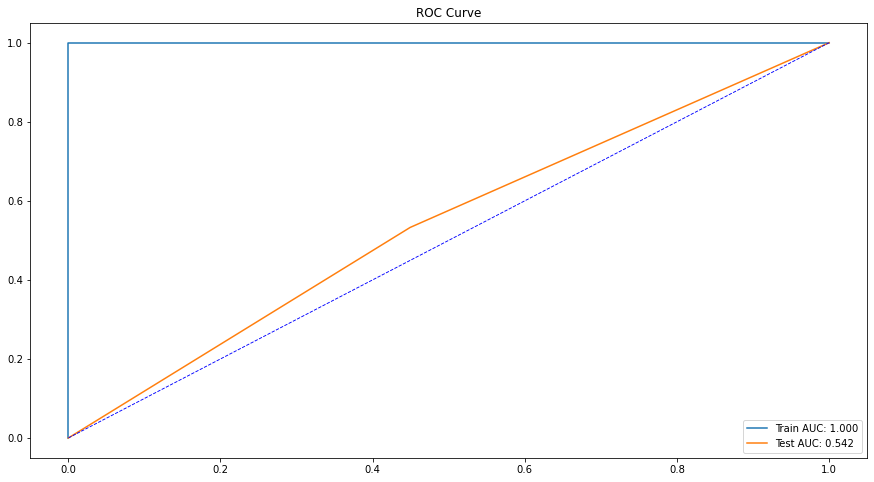

In [53]:
#  Evaluate the model performance
print('confusion_matrix is : ')
cm_2 = metrics.confusion_matrix(y_test, y_pred_dtr) 
print(cm_2)

print('='*100)

accuracy_2 = metrics.accuracy_score(y_test, y_pred_dtr) 
print("Accuracy score:",accuracy_2*100)

precision_2 = metrics.precision_score(y_test, y_pred_dtr) 
print("Precision score:",precision_2*100)

recall_2 = metrics.recall_score(y_test, y_pred_dtr) 
print("Recall score:",recall_2*100)

f1_2 = metrics.f1_score(y_test,y_pred_dtr) 
print("F1 score:",f1_2*100)

roc_auc_2 = roc_auc_score(y_test, predictions_dtr_test)
print('roc_auc_score_2 : ', roc_auc_2*100)

print('='*100)

 # Checking the summary of classification
print('classification_report is : ')
print(classification_report(y_test, predictions_dtr_test, target_names = ['NO', 'YES']))

print('='*100)

# calculate ROC
FPR, TPR, LRM = roc_curve(y_train, predictions_dtr_train)
FPR1, TPR1, LRM = roc_curve(y_test,predictions_dtr_test)
print(FPR, TPR, LRM)
print(FPR1, TPR1, LRM)

print('='*100)

# calculate AUC
auc_train_dtr = auc(FPR, TPR)
print('Train AUC: %0.3f' % auc_train_dtr)

auc_test_dtr = auc(FPR1, TPR1)
print('Test AUC: %0.3f' % auc_test_dtr)

print('='*100)

# plot the ROC curve
plt.figure(figsize=(15,8))
plt.plot(FPR, TPR, label = 'Train AUC: %0.3f'%auc_train_dtr)
plt.plot(FPR1, TPR1, label = 'Test AUC: %0.3f'%auc_test_dtr)

plt.plot([1,0],[1,0], ls = '--', color = 'blue', lw = 0.90)

plt.title('ROC Curve')
plt.legend()
plt.show();

## Hyper-parameters:

In [54]:

dtr = DecisionTreeClassifier()
tuned_parameters=[{'max_depth':[2,3,5,10],'min_samples_leaf':[5,10,20,50]}]
DTR=GridSearchCV( DecisionTreeClassifier(),tuned_parameters,scoring='roc_auc',cv=5,n_jobs=-1)
DTR.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid=[{'max_depth': [2, 3, 5, 10],
                          'min_samples_leaf': [5, 10, 20, 50]}],
             scoring='roc_auc')

In [55]:
cv_results_dtr=pd.DataFrame(DTR.cv_results_)
cv_results_dtr.head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.036977,0.006926,0.029584,0.004314,2,5,"{'max_depth': 2, 'min_samples_leaf': 5}",0.55893,0.565183,0.552612,0.561213,0.585127,0.564613,0.011037,10
1,0.048371,0.013521,0.038779,0.015057,2,10,"{'max_depth': 2, 'min_samples_leaf': 10}",0.55893,0.565183,0.552612,0.561213,0.585127,0.564613,0.011037,10
2,0.043975,0.008069,0.024786,0.011171,2,20,"{'max_depth': 2, 'min_samples_leaf': 20}",0.55893,0.565183,0.552612,0.561213,0.585127,0.564613,0.011037,10
3,0.038578,0.017294,0.032781,0.017557,2,50,"{'max_depth': 2, 'min_samples_leaf': 50}",0.55893,0.570265,0.552612,0.561213,0.585127,0.565629,0.011274,9
4,0.051770,0.019373,0.025187,0.009698,3,5,"{'max_depth': 3, 'min_samples_leaf': 5}",0.56933,0.567977,0.571589,0.559243,0.575255,0.568679,0.005323,7


In [56]:
#The accuracy of the model with the best parameters
dtr_score=DTR.score(X_test, y_test)
print("Best_Score is :" ,DTR.score(X_test, y_test)*100)

print('='*100)

dtr_score1=DTR.best_score_
print("best_score : ",dtr_score1*100)
print("best_params : ",DTR.best_params_)
print("best_estimator : ",DTR.best_estimator_)

print('='*100)

# Checking the summary of classification
print('classification_report is : ')
y_pred = DTR.predict(X_test)
print(classification_report(y_test, y_pred))

print('='*100)

hyper_accuracy_2 = metrics.accuracy_score(y_test, y_pred) 
print("Accuracy score:",hyper_accuracy_2*100)

hyper_precision_2 = metrics.precision_score(y_test, y_pred) 
print("Precision score:",hyper_precision_2*100)

hyper_recall_2 = metrics.recall_score(y_test, y_pred) 
print("Recall score:",hyper_recall_2*100)

hyper_f1_2 = metrics.f1_score(y_test, y_pred)
print("F1 score:",hyper_f1_2*100)

# roc auc score for test data
hyper_roc_auc_2 = roc_auc_score(y_test, y_pred)
print('roc_auc_score_3 : ', hyper_roc_auc_2*100)


Best_Score is : 59.86163718604052
best_score :  57.364029542808545
best_params :  {'max_depth': 5, 'min_samples_leaf': 50}
best_estimator :  DecisionTreeClassifier(max_depth=5, min_samples_leaf=50)
classification_report is : 
              precision    recall  f1-score   support

           0       0.56      0.42      0.48       710
           1       0.56      0.70      0.63       766

    accuracy                           0.56      1476
   macro avg       0.56      0.56      0.55      1476
weighted avg       0.56      0.56      0.55      1476

Accuracy score: 56.36856368563685
Precision score: 56.40756302521008
Recall score: 70.10443864229765
F1 score: 62.514551804423746
roc_auc_score_3 :  55.82686720847278


## Feature selection:

In [57]:
rfe_dtr = RFE(classifier_2,n_features_to_select=3)
rfe_fit_dtr = rfe_dtr.fit(X_train,y_train)
X_test_transform_dtr = rfe_fit_dtr.transform(X_test)

print("X_test.shape: {}".format(X_test.shape))
print("X_test_transform_Tree.shape: {}".format(X_test_transform_dtr.shape))

print("="*100)

classifier_2.fit(X_train,y_train)
print("Scoree with all features: {:,.3f}".format(classifier_2.score(X_test,y_test)))
classifier_2.fit(X_test_transform_dtr,y_test)
print("Scoree with selected features: {:,.3f}".format(classifier_2.score(X_test_transform_dtr,y_test)))

print("="*100)

print("Num Features: %d" % rfe_fit_dtr.n_features_)
print("Selected Features: %s" % rfe_fit_dtr.support_)
print("Feature Ranking: %s" % rfe_fit_dtr.ranking_)


X_test.shape: (1476, 18)
X_test_transform_Tree.shape: (1476, 3)
Scoree with all features: 0.541
Scoree with selected features: 1.000
Num Features: 3
Selected Features: [ True False False False  True False False False False  True False False
 False False False False False False]
Feature Ranking: [ 1  5 10  2  1 13  9  4  3  1  6  8  7 11 12 14 15 16]


In [ ]:
a2=classifier_2.score(X_test,y_test)
print("Scoree with all features: {:,.3f}".format(classifier_2.score(X_test,y_test)))
b2=classifier_2.score(X_test_transform_dtr,y_test)
print("Scoree with selected features: {:,.3f}".format(classifier_2.score(X_test_transform_dtr,y_test)))

## 3.Random Forest Algorithm

In [58]:
#  Fit Classifier

classifier_3 = RandomForestClassifier(n_estimators=100, criterion="entropy", random_state=0)
classifier_3.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', random_state=0)

In [59]:
# parameters
classifier_3.get_params(deep=True)

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [60]:

#  Predict
y_pred_rfr = classifier_3.predict(X_test)

# Generate predictions
predictions_rfr_train =classifier_3.predict(X_train)
predictions_rfr_test= classifier_3.predict(X_test)

#ACCURACY = TRAIN DATA SCORE 
train_Acc_3=classifier_3.score(X_train,y_train)          
print('Train_Score : ',train_Acc_3*100)

#ACCURACY = TEST DATA SCORE 
Acc_3=classifier_3.score(X_test, y_test) 
print('Train_Score : ',Acc_3*100)


Train_Score :  100.0
Train_Score :  54.607046070460704


confusion_matrix is : 
[[400 310]
 [360 406]]
Accuracy score: 54.607046070460704
Precision score: 56.70391061452514
Recall score: 53.00261096605744
F1 score: 54.79082321187584
roc_auc_score_3 :  54.67031956753576
classification_report is : 
              precision    recall  f1-score   support

          NO       0.53      0.56      0.54       710
         YES       0.57      0.53      0.55       766

    accuracy                           0.55      1476
   macro avg       0.55      0.55      0.55      1476
weighted avg       0.55      0.55      0.55      1476

[0. 0. 1.] [0. 1. 1.] [2 1 0]
[0.         0.43661972 1.        ] [0.         0.53002611 1.        ] [2 1 0]
Train AUC: 1.000
Test AUC: 0.547


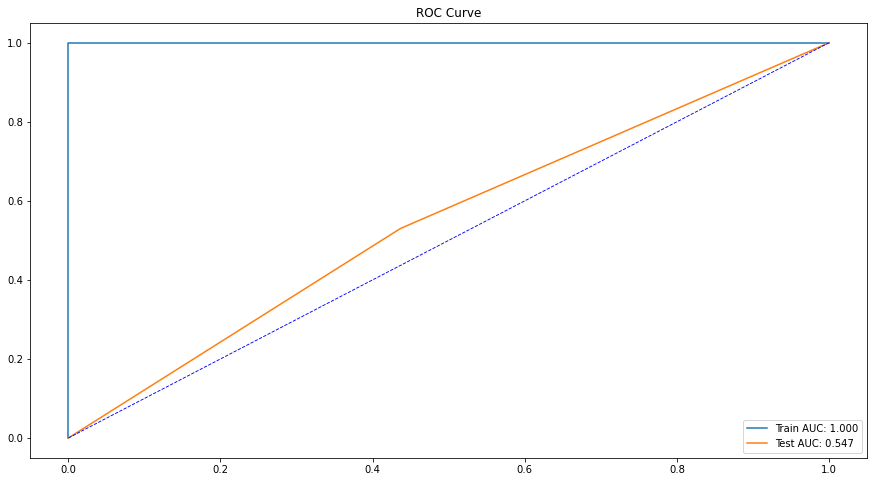

In [61]:
#  Evaluate the model performance
print('confusion_matrix is : ')
cm_3 = metrics.confusion_matrix(y_test, y_pred_rfr) 
print(cm_3)

print('='*100)

accuracy_3 = metrics.accuracy_score(y_test,y_pred_rfr) 
print("Accuracy score:",accuracy_3*100)

precision_3 = metrics.precision_score(y_test,y_pred_rfr) 
print("Precision score:",precision_3*100)

recall_3 = metrics.recall_score(y_test,y_pred_rfr) 
print("Recall score:",recall_3*100)

f1_3 = metrics.f1_score(y_test,y_pred_rfr) 
print("F1 score:",f1_3*100)

roc_auc_3 = roc_auc_score(y_test, predictions_rfr_test)
print('roc_auc_score_3 : ', roc_auc_3*100)

print('='*100)

 # Checking the summary of classification
print('classification_report is : ')
print(classification_report(y_test,predictions_rfr_test, target_names = ['NO', 'YES']))

print('='*100)

# calculate ROC
FPR, TPR, LRM = roc_curve(y_train, predictions_rfr_train)
FPR1, TPR1, LRM = roc_curve(y_test,predictions_rfr_test)
print(FPR, TPR, LRM)
print(FPR1, TPR1, LRM)

print('='*100)

# calculate AUC
auc_train_rfr = auc(FPR, TPR)
print('Train AUC: %0.3f' % auc_train_rfr)

auc_test_rfr = auc(FPR1, TPR1)
print('Test AUC: %0.3f' % auc_test_rfr)

print('='*100)

# plot the ROC curve
plt.figure(figsize=(15,8))
plt.plot(FPR, TPR, label = 'Train AUC: %0.3f'%auc_train_rfr)
plt.plot(FPR1, TPR1, label = 'Test AUC: %0.3f'%auc_test_rfr)

plt.plot([1,0],[1,0], ls = '--', color = 'blue', lw = 0.90)

plt.title('ROC Curve')
plt.legend()
plt.show();

## Hyper-parameters:

In [62]:

rfr = RandomForestClassifier(n_estimators=100, criterion="entropy", random_state=0)
tuned_parameters=[{'n_estimators':[20,50,100],'max_features':[1,2,3]}]
RFR=GridSearchCV(RandomForestClassifier(n_estimators=100, criterion="entropy", random_state=0),tuned_parameters,scoring='roc_auc',cv=5)
RFR.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy',
                                              random_state=0),
             param_grid=[{'max_features': [1, 2, 3],
                          'n_estimators': [20, 50, 100]}],
             scoring='roc_auc')

In [63]:
cv_results_rfr=pd.DataFrame(RFR.cv_results_)
cv_results_rfr.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.318632,0.015850,0.031194,0.005309,1,20,"{'max_features': 1, 'n_estimators': 20}",0.575714,0.508685,0.569087,0.532802,0.538111,0.544880,0.024652,9
1,0.691593,0.036032,0.054132,0.006666,1,50,"{'max_features': 1, 'n_estimators': 50}",0.571500,0.526595,0.561610,0.535287,0.550317,0.549062,0.016474,7
2,1.343834,0.087475,0.089229,0.010677,1,100,"{'max_features': 1, 'n_estimators': 100}",0.574062,0.536776,0.560440,0.532079,0.543842,0.549440,0.015623,6
3,0.252257,0.032175,0.023994,0.002531,2,20,"{'max_features': 2, 'n_estimators': 20}",0.565672,0.569090,0.536796,0.569045,0.533395,0.554800,0.016172,5
4,0.590730,0.027817,0.043187,0.003919,2,50,"{'max_features': 2, 'n_estimators': 50}",0.565019,0.574501,0.549328,0.562718,0.541877,0.558688,0.011633,3


In [64]:
#The accuracy of the model with the best parameters
rfr_score=RFR.score(X_test, y_test)
print("Best_Score is :" ,rfr_score*100)

print('='*100)

rfr_score1=RFR.best_score_
print("best_score : ",rfr_score1*100)
print("best_params : ",RFR.best_params_)
print("best_estimator : ",RFR.best_estimator_)

print('='*100)

# Checking the summary of classification
print('classification_report is : ')
y_pred = RFR.predict(X_test)
print(classification_report(y_test, y_pred))

print('='*100)

hyper_accuracy_3 = metrics.accuracy_score(y_test, y_pred) 
print("Accuracy score:",hyper_accuracy_3*100)

hyper_precision_3 = metrics.precision_score(y_test, y_pred) 
print("Precision score:",hyper_precision_3*100)

hyper_recall_3 = metrics.recall_score(y_test, y_pred) 
print("Recall score:",hyper_recall_3*100)

hyper_f1_3 = metrics.f1_score(y_test, y_pred)
print("F1 score:",hyper_f1_3*100)

# roc auc score for test data
hyper_roc_auc_3 = roc_auc_score(y_test, y_pred)
print('roc_auc_score_3 : ', hyper_roc_auc_3*100)


Best_Score is : 56.63360055896738
best_score :  56.35434135570867
best_params :  {'max_features': 3, 'n_estimators': 100}
best_estimator :  RandomForestClassifier(criterion='entropy', max_features=3, random_state=0)
classification_report is : 
              precision    recall  f1-score   support

           0       0.52      0.54      0.53       710
           1       0.55      0.53      0.54       766

    accuracy                           0.54      1476
   macro avg       0.54      0.54      0.54      1476
weighted avg       0.54      0.54      0.54      1476

Accuracy score: 53.5230352303523
Precision score: 55.434782608695656
Recall score: 53.26370757180157
F1 score: 54.32756324900133
roc_auc_score_3 :  53.533262236605005


## Feature selection:

In [65]:

rfe_rfr = RFE(classifier_3,n_features_to_select=53)
rfe_fit_rfr = rfe_rfr.fit(X_train,y_train)
X_test_transform_rfr = rfe_fit_rfr.transform(X_test)

print("x_test.shape: {}".format(X_test.shape))
print("X_test_transform_Random.shape: {}".format(X_test_transform_rfr.shape))

print('='*100)

classifier_3.fit(X_train,y_train)
print("Scoree with all features: {:,.3f}".format(classifier_3.score(X_test,y_test)))
classifier_3.fit(X_test_transform_rfr,y_test)
print("Scoree with selected features: {:,.3f}".format(classifier_3.score(X_test_transform_rfr,y_test)))

print('='*100)

print("Num Features: %d" % rfe_fit_rfr.n_features_)
print("Selected Features: %s" % rfe_fit_rfr.support_)
print("Feature Ranking: %s" % rfe_fit_rfr.ranking_)


x_test.shape: (1476, 18)
X_test_transform_Random.shape: (1476, 18)
Scoree with all features: 0.546
Scoree with selected features: 1.000
Num Features: 18
Selected Features: [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]
Feature Ranking: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [66]:
a3=classifier_3.score(X_test,y_test)
print("Scoree with all features: {:,.3f}".format(classifier_3.score(X_test,y_test)))
b3=classifier_3.score(X_test_transform_rfr,y_test)
print("Scoree with selected features: {:,.3f}".format(classifier_3.score(X_test_transform_rfr,y_test)))

Scoree with all features: 1.000
Scoree with selected features: 1.000


## 4.KNN

In [67]:
# fitting the model

classifier_4 = KNeighborsClassifier(n_neighbors=3)
classifier_4.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [68]:
# parameters
classifier_4.get_params(deep=True)

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}

In [69]:

#  Predict
y_pred_knn = classifier_4.predict(X_test)

# Generate predictions
predictions_knn_train =classifier_4.predict(X_train)
predictions_knn_test= classifier_4.predict(X_test)

#ACCURACY = TRAIN DATA SCORE 
train_Acc_4=classifier_4.score(X_train,y_train)          
print('Train_Score : ',train_Acc_4*100)

#ACCURACY = TEST DATA SCORE 
Acc_4=classifier_4.score(X_test, y_test) 
print('Test_Score : ',Acc_4*100)


Train_Score :  75.45031958163858
Test_Score :  52.710027100271006


confusion_matrix is : 
[[390 320]
 [378 388]]
Accuracy score: 52.710027100271006
Precision score: 54.80225988700565
Recall score: 50.65274151436031
F1 score: 52.645861601085485
roc_auc_score_3 :  52.79115948957451
classification_report is : 
              precision    recall  f1-score   support

          NO       0.51      0.55      0.53       710
         YES       0.55      0.51      0.53       766

    accuracy                           0.53      1476
   macro avg       0.53      0.53      0.53      1476
weighted avg       0.53      0.53      0.53      1476

[0.         0.22813036 1.        ] [0.         0.73656232 1.        ] [2 1 0]
[0.         0.45070423 1.        ] [0.         0.50652742 1.        ] [2 1 0]
Train AUC: 0.754
Test AUC: 0.528


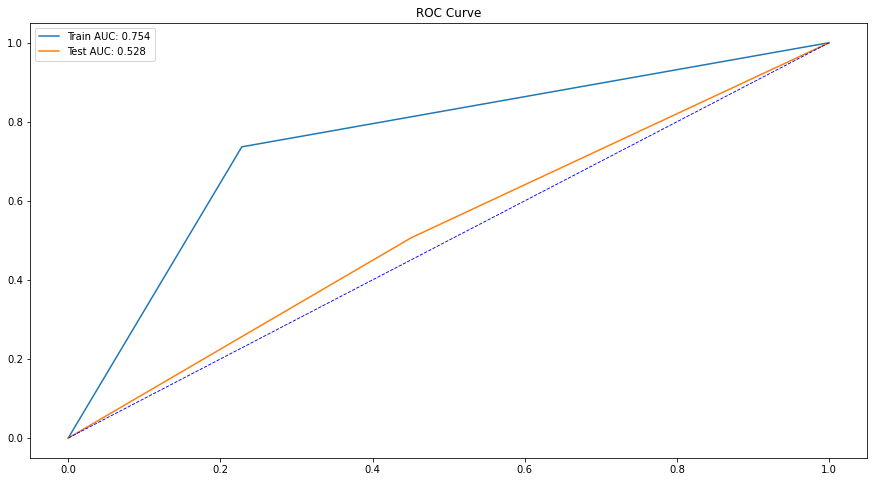

In [70]:
# Evaluate the model performance
print('confusion_matrix is : ')
cm_4 = metrics.confusion_matrix(y_test, y_pred_knn) 
print(cm_4)

print('='*100)

accuracy_4 = metrics.accuracy_score(y_test,y_pred_knn) 
print("Accuracy score:",accuracy_4*100)

precision_4 = metrics.precision_score(y_test,y_pred_knn) 
print("Precision score:",precision_4*100)

recall_4 = metrics.recall_score(y_test,y_pred_knn) 
print("Recall score:",recall_4*100)

f1_4 = metrics.f1_score(y_test,y_pred_knn) 
print("F1 score:",f1_4*100)

roc_auc_4 = roc_auc_score(y_test, predictions_knn_test)
print('roc_auc_score_3 : ', roc_auc_4*100)

print('='*100)

# Checking the summary of classification
print('classification_report is : ')
print(classification_report(y_test,predictions_knn_test, target_names = ['NO', 'YES']))

print('='*100)

# calculate 
FPR, TPR, LRM = roc_curve(y_train, predictions_knn_train)
FPR1, TPR1, LRM = roc_curve(y_test,predictions_knn_test)
print(FPR, TPR, LRM)
print(FPR1, TPR1, LRM)

print('='*100)

# calculate AUC
auc_train_knn = auc(FPR, TPR)
print('Train AUC: %0.3f' % auc_train_knn)

auc_test_knn = auc(FPR1, TPR1)
print('Test AUC: %0.3f' % auc_test_knn)

print('='*100)

# plot the ROC curve
plt.figure(figsize=(15,8))
plt.plot(FPR, TPR, label = 'Train AUC: %0.3f'%auc_train_knn)
plt.plot(FPR1, TPR1, label = 'Test AUC: %0.3f'%auc_test_knn)

plt.plot([1,0],[1,0], ls = '--', color = 'blue', lw = 0.90)

plt.title('ROC Curve')
plt.legend()
plt.show();

## Hyper-parameters:

In [71]:

knn = KNeighborsClassifier(n_neighbors=3)
tuned_parameters=[{'n_neighbors':[3,20,2],'metric':['canberra','euclidean','minkowski']}]
KNN=GridSearchCV(KNeighborsClassifier(n_neighbors=3),tuned_parameters,scoring='roc_auc',cv=5,n_jobs=-1)
KNN.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=3), n_jobs=-1,
             param_grid=[{'metric': ['canberra', 'euclidean', 'minkowski'],
                          'n_neighbors': [3, 20, 2]}],
             scoring='roc_auc')

In [72]:
cv_results_knn=pd.DataFrame(KNN.cv_results_)
cv_results_knn.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.039988,0.005656,0.495876,0.034026,canberra,3,"{'metric': 'canberra', 'n_neighbors': 3}",0.528302,0.525820,0.539429,0.520655,0.484051,0.519651,0.018828,1
1,0.047190,0.014618,0.481479,0.011197,canberra,20,"{'metric': 'canberra', 'n_neighbors': 20}",0.505504,0.508887,0.510486,0.513580,0.508659,0.509423,0.002632,3
2,0.055182,0.013242,0.420902,0.035877,canberra,2,"{'metric': 'canberra', 'n_neighbors': 2}",0.506650,0.514130,0.557511,0.510955,0.496792,0.517208,0.020982,2
3,0.060783,0.012749,0.196025,0.011124,euclidean,3,"{'metric': 'euclidean', 'n_neighbors': 3}",0.471879,0.495343,0.519679,0.503757,0.534215,0.504975,0.021264,6
4,0.063990,0.012130,0.219941,0.013616,euclidean,20,"{'metric': 'euclidean', 'n_neighbors': 20}",0.505529,0.469077,0.492544,0.495997,0.463824,0.485394,0.016127,8


In [73]:
#The accuracy of the model with the best parameters
knn_score=KNN.score(X_test, y_test)
print("Best_Score is :" ,knn_score*100)

print('='*100)

knn_score1=KNN.best_score_
print("best_score : ",knn_score1*100)
print("best_params : ",KNN.best_params_)
print("best_estimator : ",KNN.best_estimator_)

print('='*100)

# Checking the summary of classification
print('classification_report is : ')
y_pred = KNN.predict(X_test)
print(classification_report(y_test, y_pred))

print('='*100)

hyper_accuracy_4 = metrics.accuracy_score(y_test, y_pred) 
print("Accuracy score:",hyper_accuracy_4*100)

hyper_precision_4 = metrics.precision_score(y_test, y_pred) 
print("Precision score:",hyper_precision_4*100)

hyper_recall_4 = metrics.recall_score(y_test, y_pred) 
print("Recall score:",hyper_recall_4*100)

hyper_f1_4 = metrics.f1_score(y_test, y_pred)
print("F1 score:",hyper_f1_4*100)

# roc auc score for test data
hyper_roc_auc_4 = roc_auc_score(y_test, y_pred)
print('roc_auc_score_3 : ', hyper_roc_auc_4*100)


Best_Score is : 52.59515316441733
best_score :  51.96512814311133
best_params :  {'metric': 'canberra', 'n_neighbors': 3}
best_estimator :  KNeighborsClassifier(metric='canberra', n_neighbors=3)
classification_report is : 
              precision    recall  f1-score   support

           0       0.51      0.50      0.51       710
           1       0.55      0.55      0.55       766

    accuracy                           0.53      1476
   macro avg       0.53      0.53      0.53      1476
weighted avg       0.53      0.53      0.53      1476

Accuracy score: 52.913279132791324
Precision score: 54.58064516129032
Recall score: 55.22193211488251
F1 score: 54.89941596365997
roc_auc_score_3 :  52.82223366307506


## Feature selection:

In [74]:

rfe_knn = RFE(classifier_4,n_features_to_select=53)
rfe_fit_knn = rfe_knn.fit(X_train,y_train)
X_test_transform_knn = rfe_fit_knn.transform(X_test)

print("x_test.shape: {}".format(X_test.shape))
print("X_test_transform_Random.shape: {}".format(X_test_transform_knn.shape))

print('='*100)

classifier_4.fit(X_train,y_train)
print("Scoree with all features: {:,.3f}".format(classifier_4.score(X_test,y_test)))
classifier_4.fit(X_test_transform_knn,y_test)
print("Scoree with selected features: {:,.3f}".format(classifier_4.score(X_test_transform_knn,y_test)))

print('='*100)

print("Num Features: %d" % rfe_fit_knn.n_features_)
print("Selected Features: %s" % rfe_fit_knn.support_)
print("Feature Ranking: %s" % rfe_fit_knn.ranking_)


x_test.shape: (1476, 18)
X_test_transform_Random.shape: (1476, 18)
Scoree with all features: 0.527
Scoree with selected features: 0.754
Num Features: 18
Selected Features: [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]
Feature Ranking: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [75]:
a4=classifier_4.score(X_test,y_test)
print("Scoree with all features: {:,.3f}".format(classifier_4.score(X_test,y_test)))
b4=classifier_4.score(X_test_transform_knn,y_test)
print("Scoree with selected features: {:,.3f}".format(classifier_4.score(X_test_transform_knn,y_test)))

Scoree with all features: 0.754
Scoree with selected features: 0.754


## 5.SVM

In [76]:
# fitting the model

classifier_5 = svm.SVC()
classifier_5.fit(X_train, y_train)


SVC()

In [77]:
# parameters
classifier_5.get_params(deep=True)

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [78]:
#  Predict
y_pred_svc = classifier_5.predict(X_test)

# Generate predictions
predictions_svc_train =classifier_5.predict(X_train)
predictions_svc_test= classifier_5.predict(X_test)
                                           
#ACCURACY = TRAIN DATA SCORE 
train_Acc_5=classifier_5.score(X_train,y_train)          
print('Train_Score : ',train_Acc_5*100)

#ACCURACY = TEST DATA SCORE 
Acc_5=classifier_5.score(X_test, y_test) 
print('Test_Score : ',Acc_5*100)


Train_Score :  51.568855316676355
Test_Score :  49.93224932249323


confusion_matrix is : 
[[565 145]
 [594 172]]
Accuracy score: 49.93224932249323
Precision score: 54.25867507886435
Recall score: 22.45430809399478
F1 score: 31.76361957525392
roc_auc_score_5 :  51.01588644136359
classification_report is : 
              precision    recall  f1-score   support

          NO       0.49      0.80      0.60       710
         YES       0.54      0.22      0.32       766

    accuracy                           0.50      1476
   macro avg       0.52      0.51      0.46      1476
weighted avg       0.52      0.50      0.46      1476

[0.       0.189251 1.      ] [0.         0.21086828 1.        ] [2 1 0]
[0.         0.20422535 1.        ] [0.         0.22454308 1.        ] [2 1 0]
Train AUC: 0.511
Test AUC: 0.510


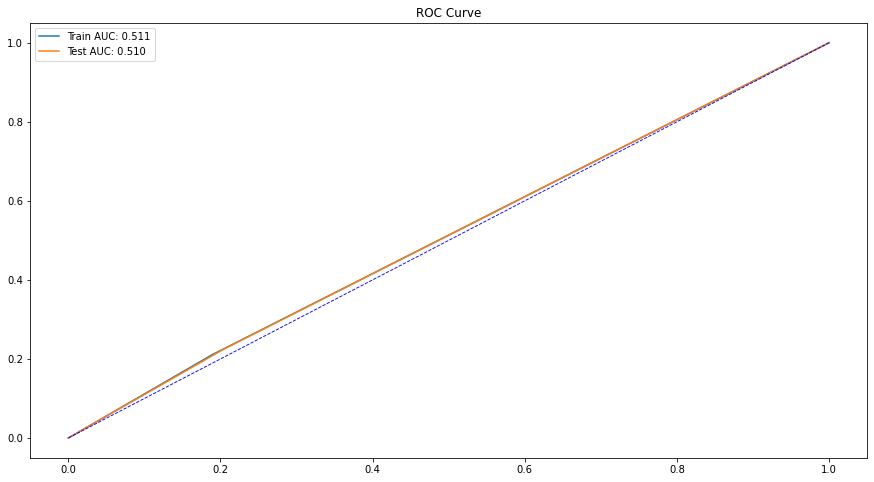

In [79]:
#  Evaluate the model performance
print('confusion_matrix is : ')
cm_5 = metrics.confusion_matrix(y_test, y_pred_svc) 
print(cm_5)

print('='*100)

accuracy_5 = metrics.accuracy_score(y_test,y_pred_svc) 
print("Accuracy score:",accuracy_5*100)

precision_5 = metrics.precision_score(y_test,y_pred_svc) 
print("Precision score:",precision_5*100)

recall_5 = metrics.recall_score(y_test,y_pred_svc) 
print("Recall score:",recall_5*100)

f1_5 = metrics.f1_score(y_test,y_pred_svc) 
print("F1 score:",f1_5*100)

roc_auc_5 = roc_auc_score(y_test, predictions_svc_test)
print('roc_auc_score_5 : ', roc_auc_5*100)

print('='*100)

# Checking the summary of classification
print('classification_report is : ')
print(classification_report(y_test,predictions_svc_test, target_names = ['NO', 'YES']))

print('='*100)

# calculate 
FPR, TPR, LRM = roc_curve(y_train, predictions_svc_train)
FPR1, TPR1, LRM = roc_curve(y_test,predictions_svc_test)
print(FPR, TPR, LRM)
print(FPR1, TPR1, LRM)

print('='*100)

# calculate AUC
auc_train_svc = auc(FPR, TPR)
print('Train AUC: %0.3f' % auc_train_svc)

auc_test_svc = auc(FPR1, TPR1)
print('Test AUC: %0.3f' % auc_test_svc)

print('='*100)

# plot the ROC curve
plt.figure(figsize=(15,8))
plt.plot(FPR, TPR, label = 'Train AUC: %0.3f'%auc_train_svc)
plt.plot(FPR1, TPR1, label = 'Test AUC: %0.3f'%auc_test_svc)

plt.plot([1,0],[1,0], ls = '--', color = 'blue', lw = 0.90)

plt.title('ROC Curve')
plt.legend()
plt.show();


## Hyper-parameters:

In [80]:

svc = svm.SVC()
tuned_parameters=[{'gamma':[1e-2,1e-3,1e-4],'C':[1,10,100,1000]}]
svc=GridSearchCV(svm.SVC(),tuned_parameters,scoring='roc_auc',cv=5)
svc.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             scoring='roc_auc')

In [81]:
cv_results_svc=pd.DataFrame(svc.cv_results_)
cv_results_svc.head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.709475,0.616564,1.123892,0.115046,1,0.01,"{'C': 1, 'gamma': 0.01}",0.494252,0.511315,0.506065,0.493183,0.490085,0.498980,0.008215,1
1,2.301891,0.423430,0.959991,0.134364,1,0.001,"{'C': 1, 'gamma': 0.001}",0.474699,0.499595,0.502473,0.481534,0.506491,0.492958,0.012503,9
2,1.767737,0.017151,0.742653,0.018451,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.459444,0.490569,0.505647,0.481733,0.530661,0.493611,0.023813,8
3,1.884572,0.043876,0.788964,0.018270,10,0.01,"{'C': 10, 'gamma': 0.01}",0.492229,0.511332,0.504201,0.490127,0.489012,0.497380,0.008836,2
4,1.810821,0.012695,0.771296,0.014873,10,0.001,"{'C': 10, 'gamma': 0.001}",0.474758,0.502714,0.503174,0.483702,0.505908,0.494051,0.012476,7


In [82]:
#The accuracy of the model with the best parameters
svc_score=svc.score(X_test, y_test)
print("Best_Score is :" ,svc_score*100)

print('='*100)

svc_score1=svc.best_score_
print("best_score : ",svc_score1*100)
print("best_params : ",svc.best_params_)
print("best_estimator : ",svc.best_estimator_)

print('='*100)

# Checking the summary of classification
print('classification_report is : ')
y_pred = svc.predict(X_test)
print(classification_report(y_test, y_pred))

print('='*100)

hyper_accuracy_5 = metrics.accuracy_score(y_test, y_pred) 
print("Accuracy score:",hyper_accuracy_5*100)

hyper_precision_5 = metrics.precision_score(y_test, y_pred) 
print("Precision score:",hyper_precision_5*100)

hyper_recall_5 = metrics.recall_score(y_test, y_pred) 
print("Recall score:",hyper_recall_5*100)

hyper_f1_5 = metrics.f1_score(y_test, y_pred)
print("F1 score:",hyper_f1_5*100)

# roc auc score for test data
hyper_roc_auc_5 = roc_auc_score(y_test, y_pred)
print('roc_auc_score_5 : ', hyper_roc_auc_5*100)


Best_Score is : 50.275438531975134
best_score :  49.897998424757176
best_params :  {'C': 1, 'gamma': 0.01}
best_estimator :  SVC(C=1, gamma=0.01)
classification_report is : 
              precision    recall  f1-score   support

           0       0.48      1.00      0.65       710
           1       0.73      0.01      0.02       766

    accuracy                           0.48      1476
   macro avg       0.60      0.50      0.34      1476
weighted avg       0.61      0.48      0.32      1476

Accuracy score: 48.44173441734417
Precision score: 72.72727272727273
Recall score: 1.0443864229765014
F1 score: 2.0592020592020592
roc_auc_score_5 :  50.31092560585445


## Feature selection:

In [83]:

rfe_svc = RFE(classifier_5,n_features_to_select=53)
rfe_fit_svc = rfe_svc.fit(X_train,y_train)
X_test_transform_svc = rfe_fit_svc.transform(X_test)

print("X_test.shape: {}".format(X_test.shape))
print("X_test_transform_gb.shape: {}".format(X_test_transform_svc.shape))

print("="*100)

classifier_5.fit(X_train,y_train)
print("Scoree with all features: {:,.3f}".format(classifier_5.score(X_test,y_test)))
classifier_5.fit(X_test_transform_svc,y_test)
print("Scoree with selected features: {:,.3f}".format(classifier_5.score(X_test_transform_svc,y_test)))

print("="*100)

print("Num Features: %d" % rfe_fit_svc.n_features_)
print("Selected Features: %s" % rfe_fit_svc.support_)
print("Feature Ranking: %s" % rfe_fit_svc.ranking_)

X_test.shape: (1476, 18)
X_test_transform_gb.shape: (1476, 18)
Scoree with all features: 0.499
Scoree with selected features: 0.519
Num Features: 18
Selected Features: [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]
Feature Ranking: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [84]:
a5=classifier_5.score(X_test,y_test)
print("Scoree with all features: {:,.3f}".format(classifier_5.score(X_test,y_test)))
b5=classifier_5.score(X_test_transform_svc,y_test)
print("Scoree with selected features: {:,.3f}".format(classifier_5.score(X_test_transform_svc,y_test)))

Scoree with all features: 0.519
Scoree with selected features: 0.519


## 6.Gradient Boosting

In [85]:
# fitting the model

classifier_6 = GradientBoostingClassifier()
classifier_6.fit(X_train, y_train)


GradientBoostingClassifier()

In [86]:
# parameters
classifier_6.get_params(deep=True)

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [87]:
# Predict
y_pred_grad = classifier_6.predict(X_test)

# Generate predictions
predictions_grad_train =classifier_6.predict(X_train)
predictions_grad_test= classifier_6.predict(X_test)

#ACCURACY = TRAIN DATA SCORE 
train_Acc_6=classifier_6.score(X_train,y_train)          
print('Train_Score : ',train_Acc_6*100)

#ACCURACY = TEST DATA SCORE 
Acc_6=classifier_6.score(X_test, y_test) 
print('Test_Score : ',train_Acc_6*100)



Train_Score :  68.53573503776875
Test_Score :  68.53573503776875


confusion_matrix is : 
[[363 347]
 [270 496]]
Accuracy score: 58.19783197831978
Precision score: 58.83748517200475
Recall score: 64.75195822454309
F1 score: 61.653200745804845
roc_auc_score_6 :  57.93935939396169
classification_report is : 
              precision    recall  f1-score   support

          NO       0.57      0.51      0.54       710
         YES       0.59      0.65      0.62       766

    accuracy                           0.58      1476
   macro avg       0.58      0.58      0.58      1476
weighted avg       0.58      0.58      0.58      1476

[0.         0.37678674 1.        ] [0.       0.749557 1.      ] [2 1 0]
[0.         0.48873239 1.        ] [0.         0.64751958 1.        ] [2 1 0]
Train AUC: 0.686
Test AUC: 0.579


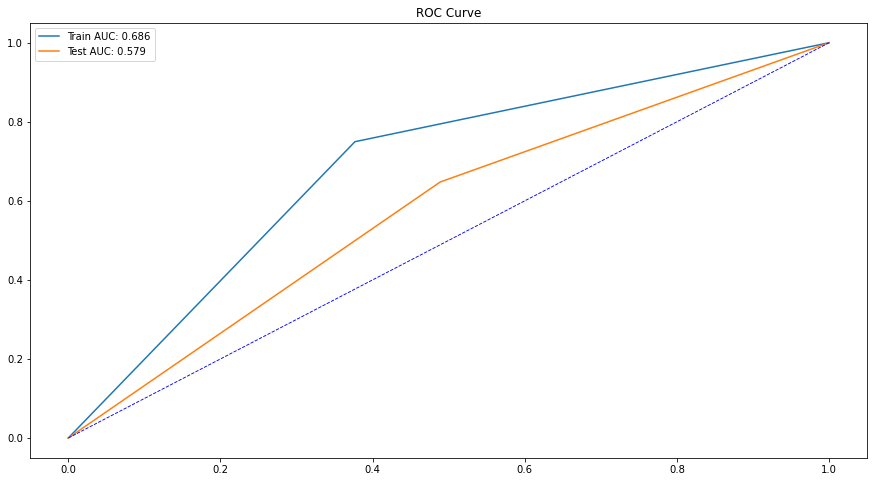

In [88]:
#  Evaluate the model performance
print('confusion_matrix is : ')
cm_6 = metrics.confusion_matrix(y_test, y_pred_grad) 
print(cm_6)

print('='*100)

accuracy_6 = metrics.accuracy_score(y_test,y_pred_grad) 
print("Accuracy score:",accuracy_6*100)

precision_6 = metrics.precision_score(y_test,y_pred_grad) 
print("Precision score:",precision_6*100)

recall_6 = metrics.recall_score(y_test,y_pred_grad) 
print("Recall score:",recall_6*100)

f1_6 = metrics.f1_score(y_test,y_pred_grad) 
print("F1 score:",f1_6*100)

roc_auc_6 = roc_auc_score(y_test, predictions_grad_test)
print('roc_auc_score_6 : ', roc_auc_6*100)

print('='*100)

# Checking the summary of classification
print('classification_report is : ')
print(classification_report(y_test, predictions_grad_test, target_names = ['NO', 'YES']))

print('='*100)

# calculate 
FPR, TPR, LRM = roc_curve(y_train, predictions_grad_train)
FPR1, TPR1, LRM = roc_curve(y_test,predictions_grad_test)
print(FPR, TPR, LRM)
print(FPR1, TPR1, LRM)

print('='*100)

# calculate AUC
auc_train_grad = auc(FPR, TPR)
print('Train AUC: %0.3f' % auc_train_grad)

auc_test_grad = auc(FPR1, TPR1)
print('Test AUC: %0.3f' % auc_test_grad)

print('='*100)

# plot the ROC curve
plt.figure(figsize=(15,8))
plt.plot(FPR, TPR, label = 'Train AUC: %0.3f'%auc_train_grad)
plt.plot(FPR1, TPR1, label = 'Test AUC: %0.3f'%auc_test_grad)

plt.plot([1,0],[1,0], ls = '--', color = 'blue', lw = 0.90)

plt.title('ROC Curve')
plt.legend()
plt.show();

## Hyper-parameters:

In [89]:

grad_boost = GradientBoostingClassifier()
tuned_parameters=[{'n_estimators': [100, 200,500],'learning_rate': [0.2,0.5,1.0],'max_depth':[1,2,3]}]
GRAD=GridSearchCV(GradientBoostingClassifier(),tuned_parameters,scoring='roc_auc',cv=5)
GRAD.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid=[{'learning_rate': [0.2, 0.5, 1.0],
                          'max_depth': [1, 2, 3],
                          'n_estimators': [100, 200, 500]}],
             scoring='roc_auc')

In [90]:
cv_results_grad=pd.DataFrame(GRAD.cv_results_)
cv_results_grad.head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.526527,0.076852,0.016221,3.105397e-03,0.2,1,100,"{'learning_rate': 0.2, 'max_depth': 1, 'n_esti...",0.572554,0.579823,0.546340,0.567861,0.577778,0.568871,0.012013,21
1,0.787707,0.039592,0.016795,3.915844e-03,0.2,1,200,"{'learning_rate': 0.2, 'max_depth': 1, 'n_esti...",0.580649,0.587906,0.560110,0.563833,0.576392,0.573778,0.010386,17
2,1.883166,0.018179,0.015184,1.604661e-03,0.2,1,500,"{'learning_rate': 0.2, 'max_depth': 1, 'n_esti...",0.594783,0.586515,0.578284,0.570440,0.574938,0.580992,0.008672,5
3,0.625910,0.008472,0.010401,1.962185e-03,0.2,2,100,"{'learning_rate': 0.2, 'max_depth': 2, 'n_esti...",0.591016,0.596890,0.569362,0.561027,0.557733,0.575206,0.015878,14
4,1.240311,0.009860,0.011996,5.917394e-07,0.2,2,200,"{'learning_rate': 0.2, 'max_depth': 2, 'n_esti...",0.591471,0.584703,0.591970,0.556450,0.572715,0.579462,0.013440,7


In [91]:
#The accuracy of the model with the best parameters
grad_score=GRAD.score(X_test, y_test)
print("Best_Score is :" ,grad_score*100)

print('='*100)

grad_score1=GRAD.best_score_
print("best_score : ",grad_score1*100)
print("best_params : ",GRAD.best_params_)
print("best_estimator : ",GRAD.best_estimator_)

print('='*100)

# Checking the summary of classification
print('classification_report is : ')
y_pred = GRAD.predict(X_test)
print(classification_report(y_test, y_pred))

print('='*100)

hyper_accuracy_6 = metrics.accuracy_score(y_test, y_pred) 
print("Accuracy score:",hyper_accuracy_6*100)

hyper_precision_6 = metrics.precision_score(y_test, y_pred) 
print("Precision score:",hyper_precision_6*100)

hyper_recall_6 = metrics.recall_score(y_test, y_pred) 
print("Recall score:",hyper_recall_6*100)

hyper_f1_6 = metrics.f1_score(y_test, y_pred)
print("F1 score:",hyper_f1_6*100)

hyper_roc_auc_6 = roc_auc_score(y_test, y_pred)
print('roc_auc_score_6 : ', hyper_roc_auc_6)

Best_Score is : 59.81373882984591
best_score :  58.5815404909477
best_params :  {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}
best_estimator :  GradientBoostingClassifier(learning_rate=0.2, n_estimators=200)
classification_report is : 
              precision    recall  f1-score   support

           0       0.56      0.57      0.57       710
           1       0.60      0.59      0.59       766

    accuracy                           0.58      1476
   macro avg       0.58      0.58      0.58      1476
weighted avg       0.58      0.58      0.58      1476

Accuracy score: 57.994579945799465
Precision score: 59.65608465608465
Recall score: 58.87728459530026
F1 score: 59.264126149802884
roc_auc_score_6 :  0.5795976905821352


## Feature selection:

In [92]:

rfe_grad = RFE(classifier_6,n_features_to_select=53)
rfe_fit_grad = rfe_grad.fit(X_train,y_train)
X_test_transform_grad = rfe_fit_grad.transform(X_test)

print("x_test.shape: {}".format(X_test.shape))
print("X_test_transform_gb.shape: {}".format(X_test_transform_grad.shape))

print("="*100)

classifier_6.fit(X_train,y_train)
print("Scoree with all features: {:,.3f}".format(classifier_6.score(X_test,y_test)))
classifier_6.fit(X_test_transform_grad,y_test)
print("Scoree with selected features: {:,.3f}".format(classifier_6.score(X_test_transform_grad,y_test)))

print("="*100)

print("Num Features: %d" % rfe_fit_grad.n_features_)
print("Selected Features: %s" % rfe_fit_grad.support_)
print("Feature Ranking: %s" % rfe_fit_grad.ranking_)


x_test.shape: (1476, 18)
X_test_transform_gb.shape: (1476, 18)
Scoree with all features: 0.585
Scoree with selected features: 0.759
Num Features: 18
Selected Features: [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]
Feature Ranking: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [93]:
a6=classifier_6.score(X_test,y_test)
print("Scoree with all features: {:,.3f}".format(classifier_6.score(X_test,y_test)))
b6=classifier_6.score(X_test_transform_grad,y_test)
print("Scoree with selected features: {:,.3f}".format(classifier_6.score(X_test_transform_grad,y_test)))

Scoree with all features: 0.759
Scoree with selected features: 0.759


## 7.Ada Boost

In [94]:
# fitting the model

classifier_7 = AdaBoostClassifier(n_estimators = 20, learning_rate = 0.2, random_state = 123)
classifier_7.fit(X_train, y_train)


AdaBoostClassifier(learning_rate=0.2, n_estimators=20, random_state=123)

In [95]:
# parameters
classifier_7.get_params(deep=True)

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 0.2,
 'n_estimators': 20,
 'random_state': 123}

In [96]:
#  Predict
y_pred_ada = classifier_7.predict(X_test)

# Generate predictions
predictions_ada_train =classifier_7.predict(X_train)
predictions_ada_test= classifier_7.predict(X_test)

#ACCURACY = TRAIN DATA SCORE 
train_Acc_7=classifier_7.score(X_train,y_train)          
print('Train_Score : ',train_Acc_7*100)

#ACCURACY = TEST DATA SCORE 
Acc_7=classifier_7.score(X_test, y_test) 
print('Train_Score : ',Acc_7*100)


Train_Score :  56.507844276583384
Train_Score :  56.43631436314364


confusion_matrix is : 
[[183 527]
 [116 650]]
Accuracy score: 56.43631436314364
Precision score: 55.225148683092605
Recall score: 84.85639686684074
F1 score: 66.90684508492022
roc_auc_score_7 :  55.31552237708234
classification_report is : 
              precision    recall  f1-score   support

          NO       0.61      0.26      0.36       710
         YES       0.55      0.85      0.67       766

    accuracy                           0.56      1476
   macro avg       0.58      0.55      0.52      1476
weighted avg       0.58      0.56      0.52      1476

[0.         0.71412236 1.        ] [0.         0.85351447 1.        ] [2 1 0]
[0.         0.74225352 1.        ] [0.         0.84856397 1.        ] [2 1 0]
Train AUC: 0.570
Test AUC: 0.553


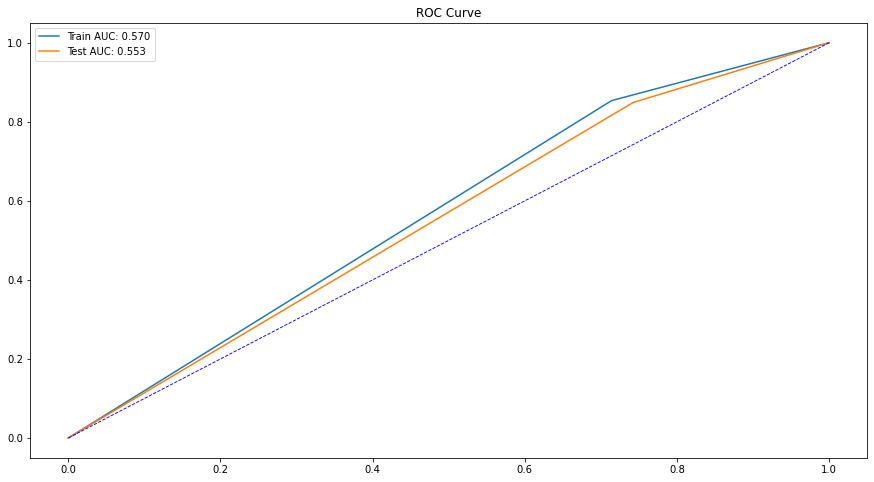

In [97]:
# Evaluate the model performance
print('confusion_matrix is : ')
cm_7 = metrics.confusion_matrix(y_test, y_pred_ada) 
print(cm_7)

print('='*100)

accuracy_7 = metrics.accuracy_score(y_test,y_pred_ada) 
print("Accuracy score:",accuracy_7*100)

precision_7 = metrics.precision_score(y_test,y_pred_ada) 
print("Precision score:",precision_7*100)

recall_7 = metrics.recall_score(y_test,y_pred_ada) 
print("Recall score:",recall_7*100)

f1_7 = metrics.f1_score(y_test,y_pred_ada) 
print("F1 score:",f1_7*100)

roc_auc_7 = roc_auc_score(y_test, y_pred_ada)
print('roc_auc_score_7 : ', roc_auc_7*100)

print('='*100)

# Checking the summary of classification
print('classification_report is : ')
print(classification_report(y_test, predictions_ada_test, target_names = ['NO', 'YES']))

print('='*100)

# calculate 
FPR, TPR, LRM = roc_curve(y_train, predictions_ada_train)
FPR1, TPR1, LRM = roc_curve(y_test,predictions_ada_test)
print(FPR, TPR, LRM)
print(FPR1, TPR1, LRM)

print('='*100)

# calculate AUC
auc_train_ada = auc(FPR, TPR)
print('Train AUC: %0.3f' % auc_train_ada)

auc_test_ada = auc(FPR1, TPR1)
print('Test AUC: %0.3f' % auc_test_ada)

print('='*100)

# plot the ROC curve
plt.figure(figsize=(15,8))
plt.plot(FPR, TPR, label = 'Train AUC: %0.3f'%auc_train_ada)
plt.plot(FPR1, TPR1, label = 'Test AUC: %0.3f'%auc_test_ada)

plt.plot([1,0],[1,0], ls = '--', color = 'blue', lw = 0.90)

plt.title('ROC Curve')
plt.legend()
plt.show();

## Hyper-parameters:

In [98]:

ada_boost = AdaBoostClassifier(n_estimators = 20, learning_rate = 0.2, random_state = 123)
tuned_parameters=[{'n_estimators': [100, 200,500],'learning_rate': [0.2,0.5,1.0]}]
ADA=GridSearchCV(AdaBoostClassifier(n_estimators = 20, learning_rate = 0.2, random_state = 123),tuned_parameters,scoring='roc_auc',cv=5)
ADA.fit(X_train,y_train)


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(learning_rate=0.2, n_estimators=20,
                                          random_state=123),
             param_grid=[{'learning_rate': [0.2, 0.5, 1.0],
                          'n_estimators': [100, 200, 500]}],
             scoring='roc_auc')

In [99]:
cv_results_ada=pd.DataFrame(ADA.cv_results_)
cv_results_ada.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.745726,0.019466,0.068246,0.000537,0.2,100,"{'learning_rate': 0.2, 'n_estimators': 100}",0.575259,0.583595,0.549683,0.567642,0.577339,0.570703,0.011681,9
1,1.472373,0.021967,0.128433,0.007966,0.2,200,"{'learning_rate': 0.2, 'n_estimators': 200}",0.581429,0.584968,0.556543,0.560114,0.573467,0.571304,0.011287,8
2,3.792070,0.220753,0.311801,0.021211,0.2,500,"{'learning_rate': 0.2, 'n_estimators': 500}",0.590716,0.584808,0.574992,0.564556,0.575428,0.578100,0.008993,4
3,0.733625,0.013316,0.073001,0.006742,0.5,100,"{'learning_rate': 0.5, 'n_estimators': 100}",0.584349,0.591665,0.561230,0.562743,0.570568,0.574111,0.012005,7
4,1.578761,0.199536,0.147162,0.046458,0.5,200,"{'learning_rate': 0.5, 'n_estimators': 200}",0.585424,0.581302,0.575228,0.568914,0.571954,0.576564,0.006042,5


In [100]:
#The accuracy of the model with the best parameters
ada_score=ADA.score(X_test, y_test)
print("Best_Score is :" ,ada_score*100)

print('='*100)

ada_score1=ADA.best_score_
print("best_score : ",ada_score1*100)
print("best_params : ",ADA.best_params_)
print("best_estimator : ",ADA.best_estimator_)

print('='*100)

# Checking the summary of classification
print('classification_report is : ')
y_pred = ADA.predict(X_test)
print(classification_report(y_test, y_pred))

print('='*100)

hyper_accuracy_7 = metrics.accuracy_score(y_test, y_pred) 
print("Accuracy score:",hyper_accuracy_7*100)

hyper_precision_7 = metrics.precision_score(y_test, y_pred) 
print("Precision score:",hyper_precision_7*100)

hyper_recall_7 = metrics.recall_score(y_test, y_pred) 
print("Recall score:",hyper_recall_7*100)

hyper_f1_7 = metrics.f1_score(y_test, y_pred)
print("F1 score:",hyper_f1_7*100)

hyper_roc_auc_7 = roc_auc_score(y_test, y_pred)
print('roc_auc_score_7 : ', hyper_roc_auc_7*100)

Best_Score is : 58.08195123745081
best_score :  58.1015635353598
best_params :  {'learning_rate': 1.0, 'n_estimators': 500}
best_estimator :  AdaBoostClassifier(n_estimators=500, random_state=123)
classification_report is : 
              precision    recall  f1-score   support

           0       0.55      0.55      0.55       710
           1       0.58      0.58      0.58       766

    accuracy                           0.56      1476
   macro avg       0.56      0.56      0.56      1476
weighted avg       0.56      0.56      0.56      1476

Accuracy score: 56.30081300813008
Precision score: 57.90849673202615
Recall score: 57.83289817232375
F1 score: 57.870672762900064
roc_auc_score_7 :  56.24039274813371


## Feature selection:

In [101]:
rfe_ada = RFE(classifier_7,n_features_to_select=53)
rfe_fit_ada = rfe_ada.fit(X_train,y_train)
X_test_transform_ada = rfe_fit_ada.transform(X_test)

print("x_test.shape: {}".format(X_test.shape))
print("X_test_transform_ada.shape: {}".format(X_test_transform_ada.shape))

print("="*100)

classifier_7.fit(X_train,y_train)
print("Scoree with all features: {:,.3f}".format(classifier_7.score(X_test,y_test)))
classifier_7.fit(X_test_transform_ada,y_test)
print("Scoree with selected features: {:,.3f}".format(classifier_7.score(X_test_transform_ada,y_test)))

print("="*100)

print("Num Features: %d" % rfe_fit_ada.n_features_)
print("Selected Features: %s" % rfe_fit_ada.support_)
print("Feature Ranking: %s" % rfe_fit_ada.ranking_)


x_test.shape: (1476, 18)
X_test_transform_ada.shape: (1476, 18)
Scoree with all features: 0.564
Scoree with selected features: 0.579
Num Features: 18
Selected Features: [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]
Feature Ranking: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [102]:
a7=classifier_7.score(X_test,y_test)
print("Scoree with all features: {:,.3f}".format(classifier_7.score(X_test,y_test)))
b7=classifier_7.score(X_test_transform_ada,y_test)
print("Scoree with selected features: {:,.3f}".format(classifier_7.score(X_test_transform_ada,y_test)))

Scoree with all features: 0.579
Scoree with selected features: 0.579


# Comparing Models:

#### 1.Without Hyper parameter tuned Scores

In [103]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','Decision Tree','Random Forest','KNN','SVC','Gradient Boosting','Ada Boosting'],
    'Train_Score': [train_Acc_1, train_Acc_2,train_Acc_3, train_Acc_4, train_Acc_5, train_Acc_6,train_Acc_7],
    'Test_Score': [Acc_1, Acc_2,Acc_3, Acc_4, Acc_5, Acc_6,Acc_7],
    'Precision': [precision_1, precision_2,precision_3, precision_4, precision_5, precision_6,precision_7],
    'Recall': [recall_1, recall_2,recall_3, recall_4, recall_5, recall_6,recall_7],
    'F1_Score': [f1_1,f1_2,f1_3,f1_4,f1_5,f1_6,f1_7],
    'Roc_Score':[roc_auc_1,roc_auc_2,roc_auc_3,roc_auc_4,roc_auc_5,roc_auc_6,roc_auc_7]
})
models.sort_values(by=['Train_Score','Test_Score','Precision','Recall','F1_Score','Roc_Score'], ascending=False)


,Model,Train_Score,Test_Score,Precision,Recall,F1_Score,Roc_Score
2,Random Forest,1.000000,0.546070,0.567039,0.530026,0.547908,0.546703
1,Decision Tree,1.000000,0.541328,0.561210,0.532637,0.546551,0.541671
3,KNN,0.754503,0.527100,0.548023,0.506527,0.526459,0.527912
5,Gradient Boosting,0.685357,0.581978,0.588375,0.647520,0.616532,0.579394
6,Ada Boosting,0.565078,0.564363,0.552251,0.848564,0.669068,0.553155
0,Logistic Regression,0.539221,0.521003,0.535758,0.577023,0.555625,0.518793
4,SVC,0.515689,0.499322,0.542587,0.224543,0.317636,0.510159


#### 2.With Hyper parameter tuned Scores:

In [104]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','Decision Tree','Random Forest','KNN','SVC','Gradient Boosting','Ada Boosting'],
    'Accuarcy' : [accuracy_1,accuracy_2,accuracy_3,accuracy_4,accuracy_5,accuracy_6,accuracy_7],
    'Precision': [hyper_precision_1, hyper_precision_2,hyper_precision_3,hyper_precision_4, hyper_precision_5, hyper_precision_6,hyper_precision_7],
    'Recall': [hyper_recall_1, hyper_recall_2,hyper_recall_3, hyper_recall_4, hyper_recall_5, hyper_recall_6,hyper_recall_7],
    'F1_Score': [hyper_f1_1,hyper_f1_2,hyper_f1_3,hyper_f1_4,hyper_f1_5,hyper_f1_6,hyper_f1_7],
    'Roc_Score':[hyper_roc_auc_1,hyper_roc_auc_2,hyper_roc_auc_3,hyper_roc_auc_4,hyper_roc_auc_5,hyper_roc_auc_6,hyper_roc_auc_7],
    'Tuned_Score' : [logi_score1,dtr_score1,rfr_score1,knn_score1,svc_score1,grad_score1,ada_score1]
})
models.sort_values(by=['Accuarcy','Precision','Recall','F1_Score','Roc_Score','Tuned_Score'], ascending=False)

,Model,Accuarcy,Precision,Recall,F1_Score,Roc_Score,Tuned_Score
5,Gradient Boosting,0.581978,0.596561,0.588773,0.592641,0.579598,0.585815
6,Ada Boosting,0.564363,0.579085,0.578329,0.578707,0.562404,0.581016
2,Random Forest,0.546070,0.554348,0.532637,0.543276,0.535333,0.563543
1,Decision Tree,0.541328,0.564076,0.701044,0.625146,0.558269,0.573640
3,KNN,0.527100,0.545806,0.552219,0.548994,0.528222,0.519651
0,Logistic Regression,0.521003,0.549828,0.626632,0.585723,0.536555,0.554968
4,SVC,0.499322,0.727273,0.010444,0.020592,0.503109,0.498980


#### 3.With feature Selection Scores:

In [105]:
models = pd.DataFrame({
    'Model': ['Random Forest','KNN','SVC','Gradient Boosting','Ada Boosting'],
    'Score_1' : [a3,a4,a5,a6,a7],
    'Score_2': [b3,b4,b5,b6,b7]   
})
models.sort_values(by=['Score_1','Score_2'], ascending=False)

,Model,Score_1,Score_2
0,Random Forest,1.000000,1.000000
3,Gradient Boosting,0.758808,0.758808
1,KNN,0.754065,0.754065
4,Ada Boosting,0.578591,0.578591
2,SVC,0.518970,0.518970


#### 4.All Scores:

In [109]:
models = pd.DataFrame({
    'Model': ['Random Forest','KNN','SVC','Gradient Boosting','Ada Boosting'],
    #'Train_Score': [train_Acc_3, train_Acc_4, train_Acc_5, train_Acc_6,train_Acc_7],
    #'Test_Score': [Acc_3, Acc_4, Acc_5, Acc_6,Acc_7],
    'Precision': [precision_3, precision_4, precision_5, precision_6,precision_7],
    'Recall': [recall_3, recall_4, recall_5, recall_6,recall_7],
    'F1_Score': [f1_3,f1_4,f1_5,f1_6,f1_7],
    'Roc_Score':[roc_auc_3,roc_auc_4,roc_auc_5,roc_auc_6,roc_auc_7],
    'Tuned_Score' : [rfr_score1,knn_score1,svc_score1,grad_score1,ada_score1],
    'Precision_1': [hyper_precision_3,hyper_precision_4, hyper_precision_5, hyper_precision_6,hyper_precision_7],
    'Recall_1': [hyper_recall_3, hyper_recall_4, hyper_recall_5, hyper_recall_6,hyper_recall_7],
    'F1_Score_1': [hyper_f1_3,hyper_f1_4,hyper_f1_5,hyper_f1_6,hyper_f1_7],
    'Roc_Score_1':[hyper_roc_auc_3,hyper_roc_auc_4,hyper_roc_auc_5,hyper_roc_auc_6,hyper_roc_auc_7],
    'Score_1' : [a3,a4,a5,a6,a7],
    'Score_2': [b3,b4,b5,b6,b7] 
})
models.sort_values(by=['Precision','Recall','F1_Score','Roc_Score','Tuned_Score','Precision_1','Recall_1','F1_Score_1','Roc_Score_1','Score_1','Score_2'], ascending=False)

,Model,Precision,Recall,F1_Score,Roc_Score,Tuned_Score,Precision_1,Recall_1,F1_Score_1,Roc_Score_1,Score_1,Score_2
3,Gradient Boosting,0.588375,0.647520,0.616532,0.579394,0.585815,0.596561,0.588773,0.592641,0.579598,0.758808,0.758808
0,Random Forest,0.567039,0.530026,0.547908,0.546703,0.563543,0.554348,0.532637,0.543276,0.535333,1.000000,1.000000
4,Ada Boosting,0.552251,0.848564,0.669068,0.553155,0.581016,0.579085,0.578329,0.578707,0.562404,0.578591,0.578591
1,KNN,0.548023,0.506527,0.526459,0.527912,0.519651,0.545806,0.552219,0.548994,0.528222,0.754065,0.754065
2,SVC,0.542587,0.224543,0.317636,0.510159,0.498980,0.727273,0.010444,0.020592,0.503109,0.518970,0.518970


#### 5.Test,Tuned,Feature Scores:

In [110]:
models = pd.DataFrame({
    'Model': ['Random Forest','KNN','SVC','Gradient Boosting','Ada Boosting'],
    #'Train_Score': [train_Acc_3, train_Acc_4, train_Acc_5, train_Acc_6,train_Acc_7],
    'Test_Score': [Acc_3, Acc_4, Acc_5, Acc_6,Acc_7],
    'Tuned_Score' : [rfr_score1,knn_score1,svc_score1,grad_score1,ada_score1],
    'Score_1' : [a3,a4,a5,a6,a7],
    'Score_2': [b3,b4,b5,b6,b7] 
})
models.sort_values(by=['Test_Score','Tuned_Score','Score_1','Score_2'], ascending=False)

,Model,Test_Score,Tuned_Score,Score_1,Score_2
3,Gradient Boosting,0.581978,0.585815,0.758808,0.758808
4,Ada Boosting,0.564363,0.581016,0.578591,0.578591
0,Random Forest,0.546070,0.563543,1.000000,1.000000
1,KNN,0.527100,0.519651,0.754065,0.754065
2,SVC,0.499322,0.498980,0.518970,0.518970
